In [ ]:
# Add to site
# Update users
# Remove users

In [ ]:
# Methods are mirror of Tabeau official api ref

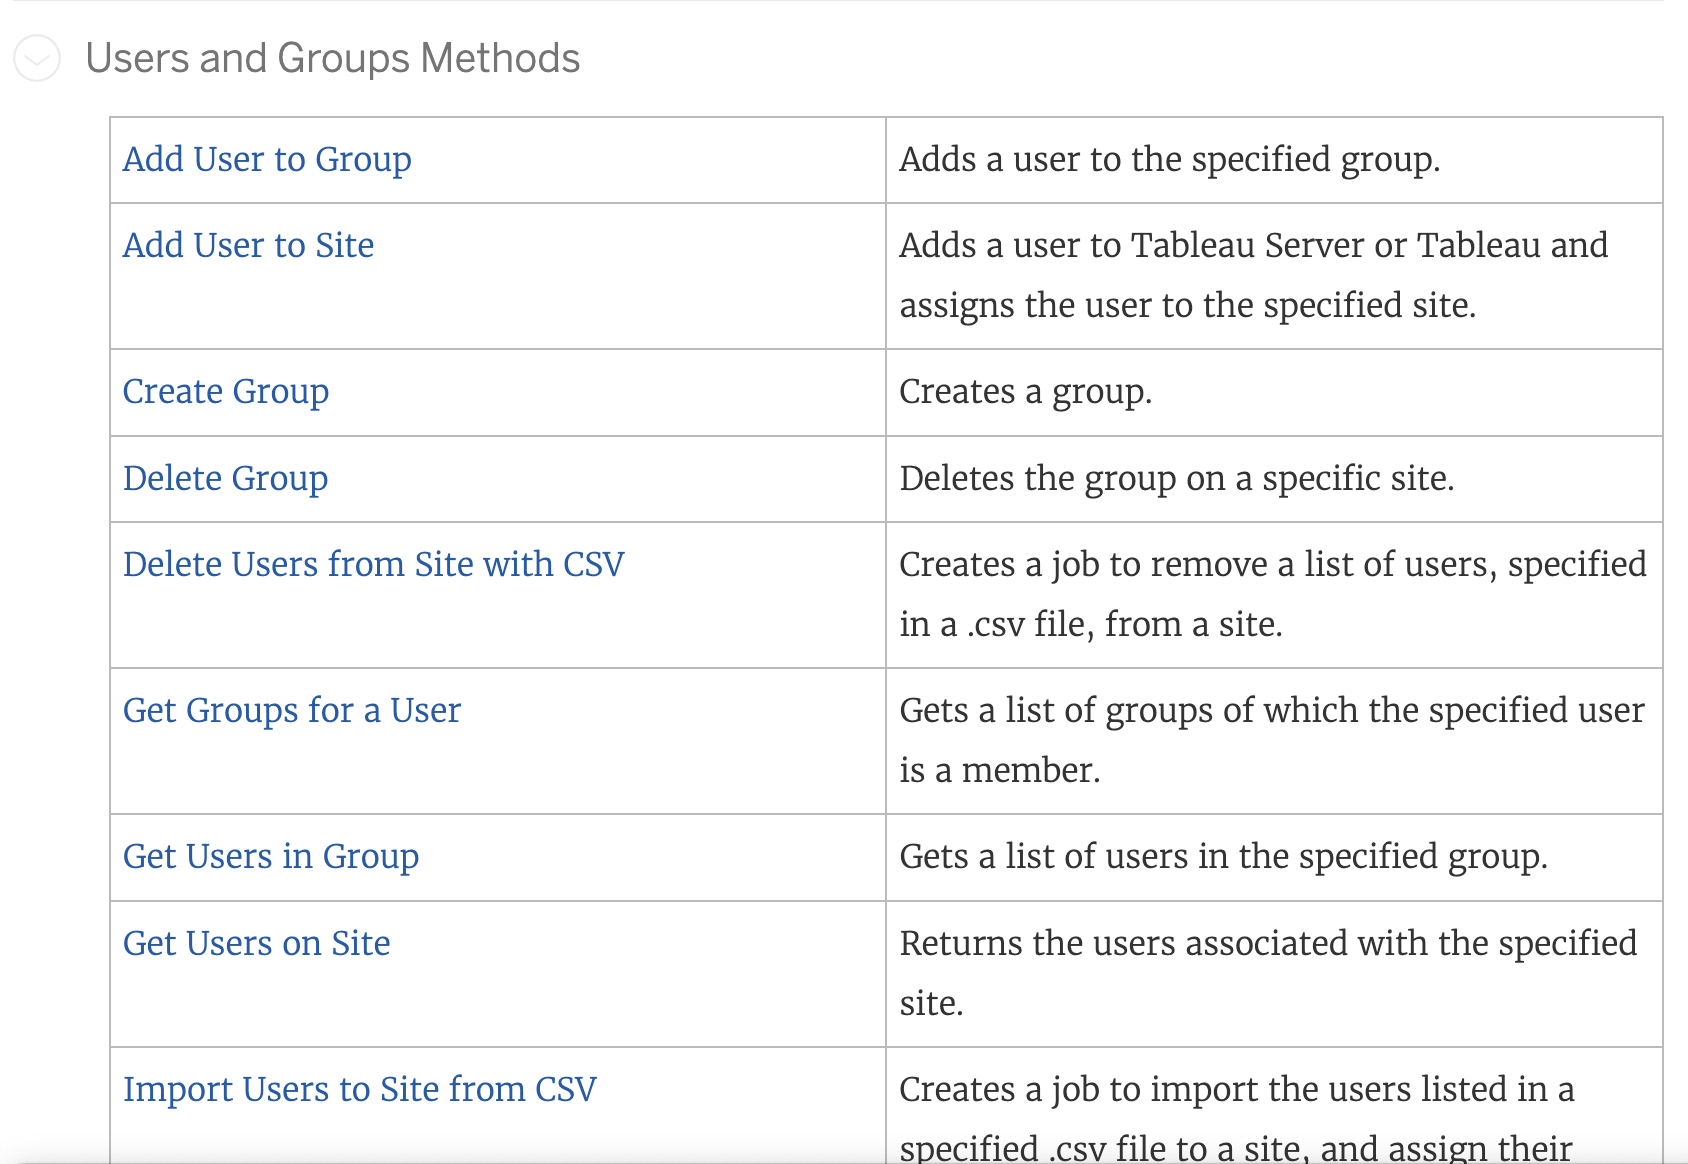

In [1]:
# importing server connection
!pip install tableau_api_lib
from tableau_api_lib import TableauServerConnection
# importing useful querying functions packed into pandas df
from tableau_api_lib.utils import querying

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.0/144.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00


In [2]:
# Exposing all info-Hide them # Use envs
# you can do for tableau_server as well
config={
    'tableau_online':{
        'server':'https://10ax.online.tableau.com/',
        'api_version':'3.10',
        'personal_access_token_name':'sahil',
        'personal_access_token_secret':'Z8B50kwuRWOrcAHzrBF5xg==:g8kaqTRBD3ivrlNGWmYXiTCJgW9AkVEi',
        'site_name':'sahiltest',
        'site_url':'sahiltest'
    }
}
conn=TableauServerConnection(config,env='tableau_online')
conn.sign_in()


/usr/local/lib/python3.10/dist-packages/tableau_api_lib/decorators/verification.py:144: UserWarning: 
                    The Tableau Server REST API version you specified is lower than the version your server uses.
                    Your Tableau Server is on REST API version 3.21.
                    The REST API version you specified is 3.10.
                    For optimal results, please change the 'api_version' config variable to 3.21.
                    
  warnings.warn(


<Response [200]>

In [3]:
querying.get_users_dataframe(conn)

domain       authSetting                      email  \
0  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA  officialhksahil@gmail.com   
1  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                b@gmail.com   
2  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA               bb@gmail.com   

                                  externalAuthUserId         fullName  \
0  53bf8b03a7327a48f955cf6d805c12c26a99fc407d5b41...  Sahil Choudhary   
1  afbc34416ac6e7fbb97331a21fa2823f56952c0796a615...    . b@gmail.com   
2  1f3242ac7fbb9c5adffe8d69934d3be5493cbf753a6cd9...         John Doe   

                                     id             lastLogin  \
0  a20ef2bb-7644-468e-a388-82e24b33fb78  2023-09-07T10:55:16Z   
1  62e2207e-5004-4351-9053-84cb97a7a4d1                   NaN   
2  1d546da7-0f30-4f5a-8b53-9c79f311bac0                   NaN   

                        name                  siteRole locale language  
0  officialhksahil@gmail.com  SiteAdministratorCreator              en  
1                b@gmail.com                Unlicensed              en  
2               bb@gmail.com                Unlicensed              en

In [4]:
#Bad
# won't run
# Auth setting not provided
response=conn.add_user_to_site(user_name='bb@gmail.com',site_role='Creator')


In [5]:
response

<Response [400]>

Want to do things in bulk?


In [ ]:
# name=['a','b','c']

# Looping method 1 - Non Pythonic Way
# for i in name:
#   conn.add_user_to_site(user_name=i)

# Looping method 2 - Pythonic Way
# res=[conn.add_user_to_site(user_name=name) for i in list]

In [ ]:
response.json()

{'error': {'summary': 'Bad Request',
  'detail': 'Payload is either malformed or incomplete',
  'code': '400003'}}

In [6]:
#Good
response=conn.add_user_to_site(user_name='bbb@gmail.com',site_role='Unlicensed',auth_setting='TableauIDWithMFA')
response

<Response [201]>

In [7]:
response.json()

{'user': {'authSetting': 'TableauIDWithMFA',
  'externalAuthUserId': 'ec73297d87e346ca7762644c07a61db9458a173063c7658cb1f71d662ab85564',
  'id': '77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb',
  'name': 'bbb@gmail.com',
  'siteRole': 'Unlicensed'}}

In [8]:
querying.get_users_dataframe(conn)

domain       authSetting                      email  \
0  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA  officialhksahil@gmail.com   
1  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                b@gmail.com   
2  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA               bb@gmail.com   
3  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA              bbb@gmail.com   

                                  externalAuthUserId         fullName  \
0  53bf8b03a7327a48f955cf6d805c12c26a99fc407d5b41...  Sahil Choudhary   
1  afbc34416ac6e7fbb97331a21fa2823f56952c0796a615...    . b@gmail.com   
2  1f3242ac7fbb9c5adffe8d69934d3be5493cbf753a6cd9...         John Doe   
3  ec73297d87e346ca7762644c07a61db9458a173063c765...  . bbb@gmail.com   

                                     id             lastLogin  \
0  a20ef2bb-7644-468e-a388-82e24b33fb78  2023-09-07T10:55:16Z   
1  62e2207e-5004-4351-9053-84cb97a7a4d1                   NaN   
2  1d546da7-0f30-4f5a-8b53-9c79f311bac0                   NaN   
3  77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb                   NaN   

                        name                  siteRole locale language  
0  officialhksahil@gmail.com  SiteAdministratorCreator              en  
1                b@gmail.com                Unlicensed              en  
2               bb@gmail.com                Unlicensed              en  
3              bbb@gmail.com                Unlicensed              en

In [9]:
# Update users
# won't run
res=conn.update_user(
    user_id='1d546da7-0f30-4f5a-8b53-9c79f311bac0',
    new_email='sahil@gmail.com',
    new_full_name='sahil@gmail.com',
    new_site_role='Viewer'
)

In [10]:
res.json()

{'error': {'summary': 'Forbidden',
  'detail': "'officialhksahil@gmail.com' isn't authorized to update user '1d546da7-0f30-4f5a-8b53-9c79f311bac0'.",
  'code': '403009'}}

In [ ]:
# Limitations of Tableau Online
# Tableau server is not ours, its tableau's
# we just have one site in this server

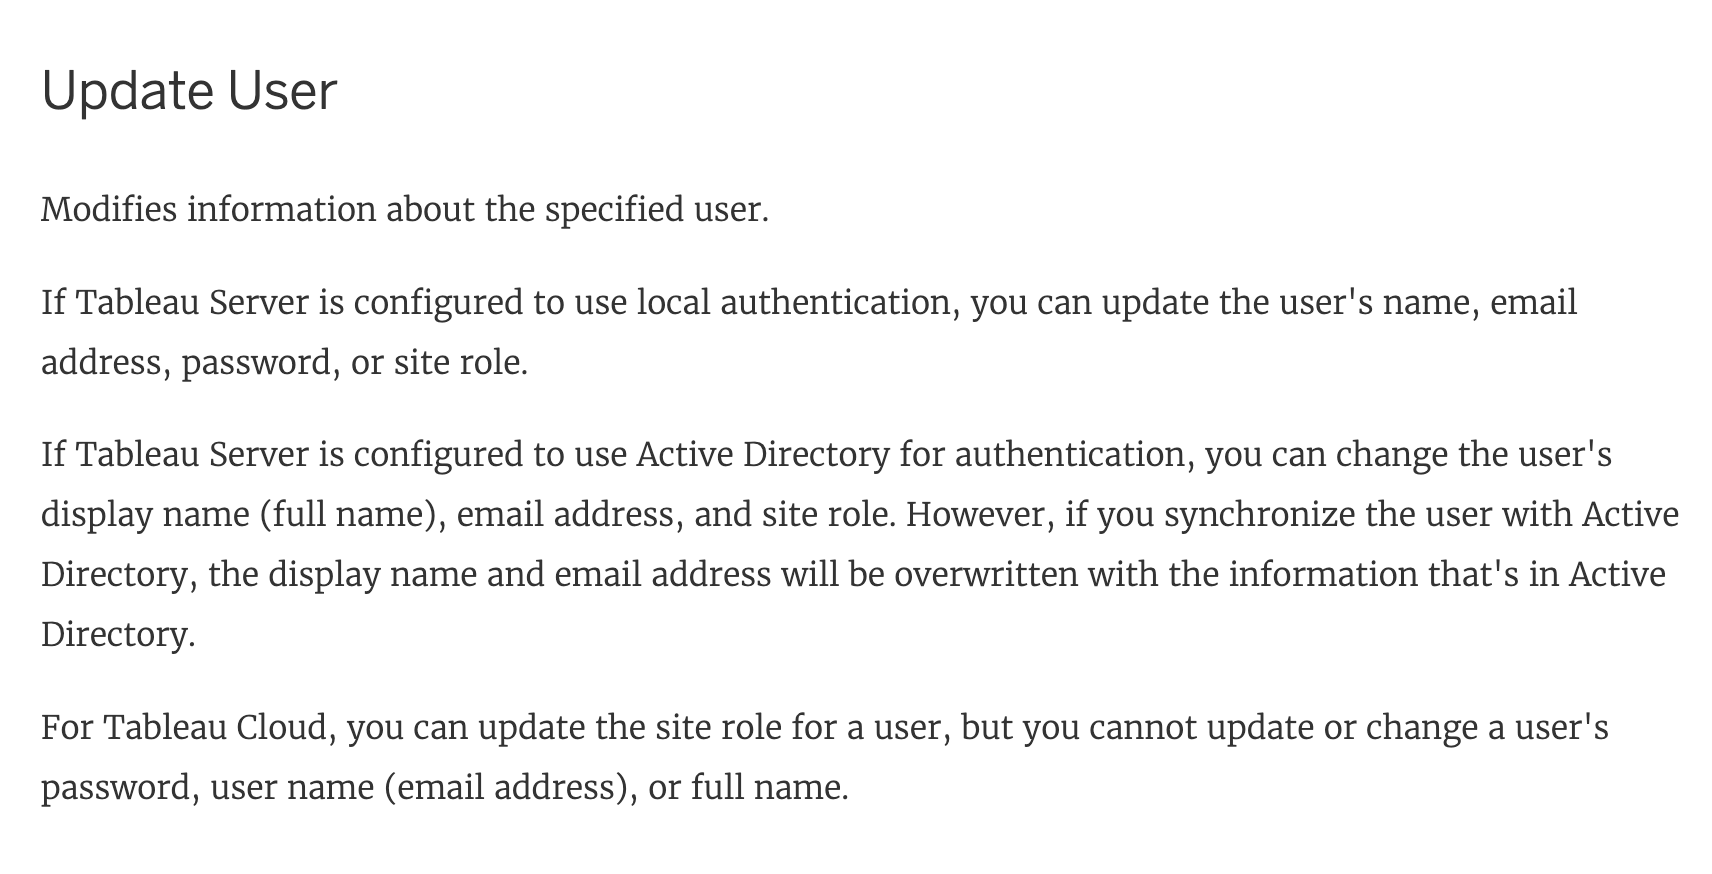

In [11]:
res=conn.update_user(
    user_id='77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb',
    new_site_role='Explorer'
)

In [12]:
res.json()

{'user': {'email': 'bbb@gmail.com',
  'fullName': '. bbb@gmail.com',
  'name': 'bbb@gmail.com',
  'siteRole': 'Explorer'}}

In [14]:
querying.get_users_dataframe(conn)

domain       authSetting                      email  \
0  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA  officialhksahil@gmail.com   
1  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                b@gmail.com   
2  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA               bb@gmail.com   
3  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA              bbb@gmail.com   

                                  externalAuthUserId         fullName  \
0  53bf8b03a7327a48f955cf6d805c12c26a99fc407d5b41...  Sahil Choudhary   
1  afbc34416ac6e7fbb97331a21fa2823f56952c0796a615...    . b@gmail.com   
2  1f3242ac7fbb9c5adffe8d69934d3be5493cbf753a6cd9...         John Doe   
3  ec73297d87e346ca7762644c07a61db9458a173063c765...  . bbb@gmail.com   

                                     id             lastLogin  \
0  a20ef2bb-7644-468e-a388-82e24b33fb78  2023-09-07T10:55:16Z   
1  62e2207e-5004-4351-9053-84cb97a7a4d1                   NaN   
2  1d546da7-0f30-4f5a-8b53-9c79f311bac0                   NaN   
3  77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb                   NaN   

                        name                  siteRole locale language  
0  officialhksahil@gmail.com  SiteAdministratorCreator              en  
1                b@gmail.com                Unlicensed              en  
2               bb@gmail.com                Unlicensed              en  
3              bbb@gmail.com                  Explorer              en

In [15]:
# Remove User
# Put the new user ID

res=conn.remove_user_from_site(user_id='77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb')


In [16]:
res

<Response [204]>

In [17]:
res.json()

JSONDecodeError: ignored

In [ ]:
querying.get_users_dataframe(conn)

domain       authSetting                      email  \
0  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA  officialhksahil@gmail.com   
1  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                a@gmail.com   
2  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                b@gmail.com   
3  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA               bb@gmail.com   

                                  externalAuthUserId         fullName  \
0  53bf8b03a7327a48f955cf6d805c12c26a99fc407d5b41...  Sahil Choudhary   
1  75f4499b59200d38f057e967e297590ab2ebaad09283dd...              A A   
2  afbc34416ac6e7fbb97331a21fa2823f56952c0796a615...    . b@gmail.com   
3  1f3242ac7fbb9c5adffe8d69934d3be5493cbf753a6cd9...         John Doe   

                                     id             lastLogin  \
0  a20ef2bb-7644-468e-a388-82e24b33fb78  2023-09-06T16:51:10Z   
1  eba98f63-b019-4911-9ced-e3dffda86ea8                   NaN   
2  62e2207e-5004-4351-9053-84cb97a7a4d1                   NaN   
3  1d546da7-0f30-4f5a-8b53-9c79f311bac0                   NaN   

                        name                  siteRole locale language  
0  officialhksahil@gmail.com  SiteAdministratorCreator              en  
1                a@gmail.com        ExplorerCanPublish              en  
2                b@gmail.com                Unlicensed              en  
3               bb@gmail.com                Unlicensed              en

Remove Users

In [ ]:
# Removing Users
# Step 1-> Unlicense
# Step 2 -> Remove
# Unlicensing

In [18]:
response = conn.update_user(user_id='77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb', new_site_role="Unlicensed")

In [19]:
response.json()

{'error': {'summary': 'Resource Not Found',
  'detail': "User '77f04ac6-8b2d-4a71-8d78-ec3cc5f19edb' could not be found.",
  'code': '404002'}}

In [ ]:
# Converting it to function and using CSVs
# def unlicense_users(conn: TableauServerConnection, users_to_unlicense_df: pd.DataFrame) -> list:
#     responses = []
#     for index, row in users_to_unlicense_df.iterrows():
#         response = conn.update_user(user_id='d6692170-919f-4f0d-8dac-fed1e2c6a906', new_site_role="Unlicensed")
#         responses.append(response)
#     return responses

In [ ]:
# Remove Users

In [ ]:
# # Converting it to function and using CSVs
# def remove_unlicensed_users(conn: TableauServerConnection) -> list:
#     users_df = querying.get_users_dataframe(conn)
#     unlicensed_users_df = users_df[users_df['siteRole'] == 'Unlicensed']

#     responses = []
#     for index, row in unlicensed_users_df.iterrows():
#         response = conn.remove_user_from_site(user_id=row['id'])
#         responses.append(response)
#     return responses
